Multivariate Naive Bayes Classification for SMS 'Spam'  |  'Ham' Filtering

Imported all necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import math
from sklearn.model_selection import KFold 

In [2]:
messages= pd.read_csv('SMSSpamCollection',sep='\t',names=['Category','SMS'])

Percentage of spam and ham

In [3]:
messages['Category'].value_counts(normalize=True)
for i in range(len(messages['Category'])):
    if messages['Category'][i]=='ham':
        messages['Category'][i] =0
    else:
        messages['Category'][i]=1

Plotted the number of spam and ham in the given dataset

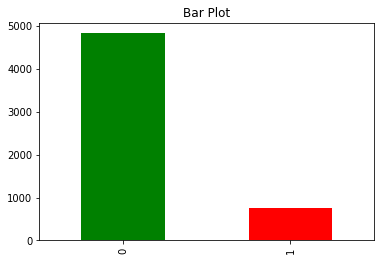

In [4]:
count_Class=pd.value_counts(messages["Category"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

Using 5 Fold cross Validation, We have splitted our dataset in training as well as testing set.

In [5]:
X = messages.iloc[:,:]
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_test_index , test_index in kf.split(X):
    train_set , test_set = X.loc[train_test_index,:],X.loc[test_index,:]
print(train_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


Replaced all the punctuation marks and then converted the sms in lower case.

In [6]:
train_set['SMS'] = train_set['SMS'].str.replace('\W',' ', regex=True)
train_set['SMS'] = train_set['SMS'].str.lower()

Put all the words of sms (training set) into a list and named it as vocab.

In [7]:
train_set['SMS'] = train_set['SMS'].str.split()

vocab = []
for sms in train_set['SMS']:
    for word in sms:
        vocab.append(word)
        
vocab = list(set(vocab))

Here, We are counting number of unique words in our training set from vocab list.

In [8]:
word_counts_per_sms = {unique_word: [0] * len(train_set['SMS']) for unique_word in vocab}
for i, sms in enumerate(train_set['SMS']):
    for word in sms:
        if word_counts_per_sms[word][i]==1:
            continue
        else:
            word_counts_per_sms[word][i]==1

In [9]:
word_counts = pd.DataFrame(word_counts_per_sms)

Isolating spam and ham messages first and then calculating probability for spam and ham.
Then counting number of words in spam as well as ham.

Here, a = 1 is considered as Laplace Smoothing


pandas.concat() function does all the heavy lifting of performing concatenation operations along with an axis of Pandas objects while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.

In [10]:
train_set_clean = pd.concat([train_set, word_counts], axis=1)

In [11]:
spam_messages = train_set_clean[train_set_clean['Category'] == 1]
ham_messages = train_set_clean[train_set_clean['Category'] == 0]

prob_spam = len(spam_messages) / len(train_set_clean)
prob_ham = len(ham_messages) / len(train_set_clean)

num_words_per_spam_message = spam_messages['SMS'].apply(len)
num_spam = num_words_per_spam_message.sum()

num_words_per_ham_message = ham_messages['SMS'].apply(len)
num_ham = num_words_per_ham_message.sum()

num_vocab = len(vocab)
print(prob_spam)
print(prob_ham)

0.13503813369223866
0.8649618663077613


Initiating and Calculating parameters in vocab list

Have defined a function Classifier that takes message as a parameter

In [12]:
parameters_spam = {unique_word:0 for unique_word in vocab}
parameters_ham = {unique_word:0 for unique_word in vocab}

for word in vocab:
    num_word_given_spam = spam_messages[word].sum()
    prob_word_given_spam = (num_word_given_spam + 1) / (len(spam_messages) + 2)
    parameters_spam[word] = (prob_word_given_spam)

    num_word_given_ham = ham_messages[word].sum() 
    prob_word_given_ham = (num_word_given_ham + 1) / (len(ham_messages) + 2)
    parameters_ham[word] = (prob_word_given_ham)

In [13]:
import re

def classifier(message):

    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    prob_spam_given_message = (-1)*(math.log(prob_spam))
    prob_ham_given_message = (-1)*(math.log(prob_ham))

    for word in message:
        if word in parameters_spam:
            prob_spam_given_message += (-1)*(math.log(parameters_spam[word]))

        if word in parameters_ham: 
            prob_ham_given_message += (-1)*(math.log(parameters_ham[word]))

    #print('P(Spam|message):', prob_spam_given_message)
    #print('P(Ham|message):', prob_ham_given_message)

    if prob_ham_given_message > prob_spam_given_message:
        print('Ham')
        return 0
    elif prob_ham_given_message < prob_spam_given_message:
        print('Spam')
        return 1
    else:
        return 'Manual intervention needed'

Called the function for following messages

In [14]:
classifier('What are you doing?how are you?')

Ham


0

In [15]:
test_set['predicted'] = test_set['SMS'].apply(classifier)

Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Spam
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Spam
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Spam
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Ham
Spam
Ham
Ham
Ham


Calculationg the Accuracy of the classifier for our testing set.
It is giving an accuracy of around 86.09 % i.e acceptable

In [16]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
    row = row[1]
    if row['Category'] == row['predicted']:
        correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy %0.2f Percent'%((correct/total)*100))

Correct: 959
Incorrect: 155
Accuracy 86.09 Percent
